# Objective
When hotels want to increase the value of their room, they offer room amenities that matter most to travelers. In fact, Per PwC’s Consumer Intelligence Series Report on hotel brand loyalty, “Both business and leisure travelers say room quality is the #1 reason for choosing a hotel.” Hotels have learned the art of  maximizing the values of their rooms, however how could AirBnB hosts that do too? 

My goal is to help hosts maximize the value of their AirBnb rental. I will do that by building a model that predicts how much revenue an Airbnb rental will earn in a month, and seeing which features contribute most to those earnings.

In [114]:
## Read Data
import csv
import pandas as pd
import re
df = pd.read_csv("New York.csv")

In [115]:
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
0,18461891,NaN,NaN,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,...,NaN,NaN,NaN,NaN,NaN,f,f,strict,f,NaN
1,20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,2.00
2,6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,0.77
3,19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,...,NaN,NaN,NaN,NaN,NaN,t,f,strict,f,NaN
4,1886820,NaN,NaN,f,t,City Island,40.841144,-73.783052,t,House,...,NaN,NaN,NaN,NaN,NaN,f,f,strict,f,NaN


In [116]:
df.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,...,availability_30,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,4.431700e+04,44317.000000,44317.000000,44317.000000,44173.000000,44244.000000,44226.000000,549.000000,44317.000000,44317.000000,...,44317.000000,44317.000000,34218.000000,34140.000000,34171.000000,34044.000000,34143.000000,34025.000000,34021.00000,34843.000000
mean,1.149792e+07,40.730049,-73.954700,2.813255,1.132739,1.158892,1.555895,727.732240,147.675948,1.482388,...,5.904484,18.145836,93.487492,9.569156,9.236721,9.726971,9.748733,9.446936,9.38053,1.446368
std,6.494719e+06,0.053905,0.042382,1.853114,0.412206,0.721120,1.071849,633.253518,209.138888,1.090597,...,9.099126,33.066623,8.209607,0.817257,1.076149,0.689432,0.670241,0.805804,0.86134,1.638707
min,2.515000e+03,40.499794,-74.253269,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,0.010000
25%,6.029332e+06,40.691219,-73.983490,2.000000,1.000000,1.000000,1.000000,325.000000,70.000000,1.000000,...,0.000000,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.00000,0.270000
50%,1.226806e+07,40.723624,-73.956728,2.000000,1.000000,1.000000,1.000000,700.000000,105.000000,1.000000,...,0.000000,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,0.870000
75%,1.736896e+07,40.764029,-73.939366,4.000000,1.000000,1.000000,2.000000,925.000000,175.000000,2.000000,...,9.000000,20.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,2.100000
max,2.117803e+07,40.909174,-73.710126,16.000000,15.500000,14.000000,40.000000,5000.000000,10000.000000,16.000000,...,30.000000,489.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,24.530000


## Create Monthly Revenue: Price Multiplied by Number of Days Occupied 
Revenue per available room (RevPAR) is a performance metric used in the hotel industry. It is calculated by multiplying a hotel's average daily room rate (ADR) by its occupancy rate. 

To calculate occupancy rate: The column in our dataset is called availability_30 and it stands for how many days the room is available in the next 30 days. So if a room is available 14 days, that means the room is occupied for 16 days (30-14). 

In [117]:
df["RevPAR"] = (df['price'] * (30 - df['availability_30']))




## Amenities
There is a column called amenities, which I care about in this project. As you can see below, they are all in one column and it looks pretty messy so I need to clean it.

In [118]:
df['amenities'][0]

'{TV,"Wireless Internet","Air conditioning",Kitchen,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card",Essentials,"Hair dryer","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}'

## Remove all non-letter characters from amenities column


In [119]:
sc_sub = re.compile('\W+')
df['amenities'] = [sc_sub.sub(' ', amenity) for amenity in df['amenities']]
print(df['amenities'][0])

 TV Wireless Internet Air conditioning Kitchen Smoke detector Carbon monoxide detector First aid kit Safety card Essentials Hair dryer translation missing en hosting_amenity_49 translation missing en hosting_amenity_50 


## Transform each amenity into a binary feature 

In [120]:
amenities2 = ['Wireless Internet', 'Air conditioning', 'Pool', 'Kitchen',
       'Free parking on premises', 'Gym', 'Hot tub', 'Indoor fireplace',
       'Heating', 'Family kid friendly', 'Suitable for events', 'Washer',
       'Dryer', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Cable TV',
       '24 hour check in', 'Laptop friendly workspace', 'Hair dryer']
for amenity in amenities2:
    df[amenity] = df.amenities.str.contains(amenity)

## What is the relationship between price and occupancy rate?


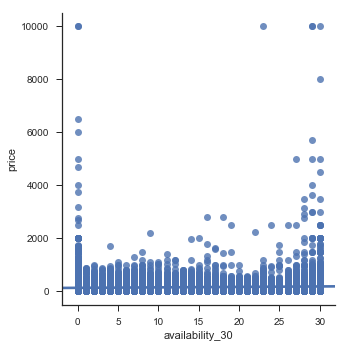

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="availability_30", y="price", data=df)
plt.show()


There is no relationship between price and occupancy rate. There are rooms that are cheap and always occupied, and there are rooms that are cheap and never occupied. This means that customers are not booking strictly based on price, which means hosts have to differentiate themselves in other ways.


## Relationship between RevPAR and Occupancy Rate

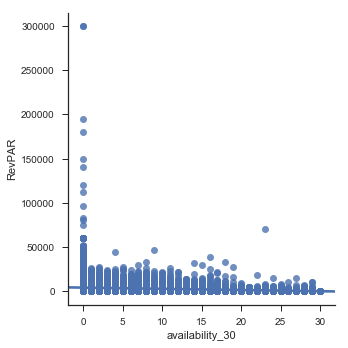

In [122]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="availability_30", y="RevPAR", data=df)
plt.show()

RevPAR decreases as availability increases, however I notice that there are potential outliers, so I will test that out.

## Remove Outliers
Remove points that are more than 3 standard deviations from the mean

In [123]:
import numpy as np
df = df[np.abs(df.RevPAR-df.RevPAR.mean())<=(3*df.RevPAR.std())]

## Relationship between price and quantity after outlier removal

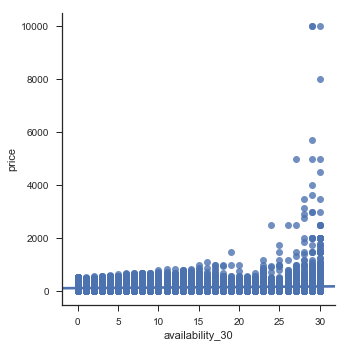

In [124]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="availability_30", y="price", data=df)
plt.show()



## Relationship between RevPAR and Occupancy Rate after outlier removal
We can see the relationship between the two more clearly now and we can definitely say that RevPAR decreases as availability increases


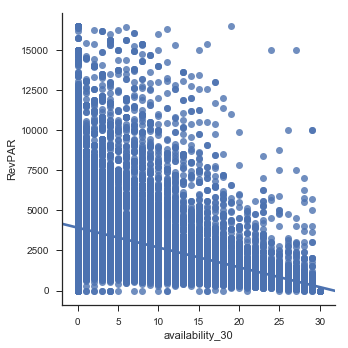

In [125]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="availability_30", y="RevPAR", data=df)
plt.show()

## Average Revenue Per Month
### Exploring our target variable


In [126]:
print("Average Monthly Revenue:", df["RevPAR"].mean())
print("Median Monthly Revenue:", df["RevPAR"].median())

Average Monthly Revenue: 3185.1005370471507
Median Monthly Revenue: 2550.0


## Create binary target variable
I will create a binary variable to turn this into a classification problem.

In [127]:
# Rooms that make more than the average monthly revenue will be labeled as 1 (Successful),
# whereas rooms that earn less will be labeled as 0 (Not Successful)
AverageRevPAR = df["RevPAR"].mean()
df["Successful"] = [1 if x >= AverageRevPAR else 0 for x in df["RevPAR"]]

## Check for columns with a lot of missing values

In [128]:
df.isnull().sum()

id                                   0
host_response_time               13493
host_response_rate               13493
host_is_superhost                  231
host_has_profile_pic               231
neighbourhood_cleansed               0
latitude                             0
longitude                            0
is_location_exact                    0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                          142
bedrooms                            73
beds                                89
bed_type                             0
amenities                            0
square_feet                      43406
price                                0
weekly_price                     35495
security_deposit                 20539
cleaning_fee                     12060
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights           

## Does an amenity contribute to how Successful a room is?

In [129]:
Exploratory_Analysis = ['Wireless Internet', 'Air conditioning', 'Pool', 'Kitchen',
       'Free parking on premises', 'Gym', 'Hot tub', 'Indoor fireplace',
       'Heating', 'Family kid friendly', 'Suitable for events', 'Washer',
       'Dryer', 'Essentials', 'Shampoo', 'Lock on bedroom door',
       '24 hour check in', 'Laptop friendly workspace', 'Hair dryer','is_business_travel_ready']
for r in Exploratory_Analysis :
    print(df.groupby(r)['Successful'].mean())

Wireless Internet
False    0.276891
True     0.393549
Name: Successful, dtype: float64
Air conditioning
False    0.198933
True     0.426632
Name: Successful, dtype: float64
Pool
False    0.388358
True     0.513570
Name: Successful, dtype: float64
Kitchen
False    0.222676
True     0.402772
Name: Successful, dtype: float64
Free parking on premises
False    0.404931
True     0.250058
Name: Successful, dtype: float64
Gym
False    0.377902
True     0.540338
Name: Successful, dtype: float64
Hot tub
False    0.390215
True     0.379205
Name: Successful, dtype: float64
Indoor fireplace
False    0.384904
True     0.515058
Name: Successful, dtype: float64
Heating
False    0.262085
True     0.401899
Name: Successful, dtype: float64
Family kid friendly
False    0.295522
True     0.522175
Name: Successful, dtype: float64
Suitable for events
False    0.388156
True     0.424434
Name: Successful, dtype: float64
Washer
False    0.348821
True     0.456334
Name: Successful, dtype: float64
Dryer
False    

## Replace missing values with 0
I'm doing this because when I manually checked rentals and if they had not received any reviews or ratings, it is recorded as null in this dataset.

In [130]:
df['number_of_reviews'].fillna(0, inplace=True)
df['review_scores_rating'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

## Drop columns that won't be used for modeling

__ I tested different models, and saw that adding more and more features was not necessarily a good thing.__

<br> __Columns that were transformed in some way:__ amenities, price, weekly_price, avaialability_30, RevPAR
<br> __Columns that won't be used do to large number of missing variables__: review_scores_accuracy, "review_scores_cleanliness","review_scores_checkin", 
"review_scores_communication", "review_scores_location", "review_scores_value",
<br>__Features that cannot be modeled__: latitude, longitude, id
<br>__Features excluded that make model worse__: cleaning fee, security_deposit, "host_has_profile_pic",'bathrooms','bedrooms','beds','accommodates','square_feet','guests_included','minimum_nights','maximum_nights'


In [131]:
df.drop(["amenities","id","price","weekly_price", 
         "availability_30", "review_scores_accuracy", "review_scores_cleanliness","review_scores_checkin", 
         "review_scores_communication", "review_scores_location", "review_scores_value",
         "cleaning_fee", "security_deposit",
         "host_has_profile_pic",'bathrooms','bedrooms','beds', 'latitude','longitude',
         'accommodates','square_feet','guests_included','minimum_nights','maximum_nights'], axis=1, inplace = True)

## Establish features to be used and target variable

In [132]:
X = df[[
        'neighbourhood_cleansed','is_location_exact',
       'bed_type',
        'number_of_reviews',
       'instant_bookable', 'cancellation_policy', 'Wireless Internet',
       'Air conditioning', 'Pool', 'Kitchen', 'Free parking on premises',
       'Gym', 'Hot tub', 'Indoor fireplace', 'Heating', 'Family kid friendly',
       'Suitable for events', 'Washer', 'Dryer', 'Essentials', 'Shampoo', 'Cable TV',
       'Lock on bedroom door', '24 hour check in', 'Laptop friendly workspace',
       'Hair dryer','is_business_travel_ready','number_of_reviews','review_scores_rating','reviews_per_month']]

y = df["Successful"]

## Check for missing values to be sure 

In [133]:
X.isnull().sum()

neighbourhood_cleansed       0
is_location_exact            0
bed_type                     0
number_of_reviews            0
instant_bookable             0
cancellation_policy          0
Wireless Internet            0
Air conditioning             0
Pool                         0
Kitchen                      0
Free parking on premises     0
Gym                          0
Hot tub                      0
Indoor fireplace             0
Heating                      0
Family kid friendly          0
Suitable for events          0
Washer                       0
Dryer                        0
Essentials                   0
Shampoo                      0
Cable TV                     0
Lock on bedroom door         0
24 hour check in             0
Laptop friendly workspace    0
Hair dryer                   0
is_business_travel_ready     0
number_of_reviews            0
review_scores_rating         0
reviews_per_month            0
dtype: int64

## Correlation Analysis
Machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

In [134]:
df[df.columns[1:]].corr()['Successful'][:-1]

number_of_reviews            0.011391
review_scores_rating         0.041396
reviews_per_month           -0.040757
RevPAR                       0.766692
Wireless Internet            0.042600
Air conditioning             0.172067
Pool                         0.026659
Kitchen                      0.095734
Free parking on premises    -0.094500
Gym                          0.086521
Hot tub                     -0.004663
Indoor fireplace             0.050393
Heating                      0.080836
Family kid friendly          0.229042
Suitable for events          0.015126
Washer                       0.107030
Dryer                        0.111268
Essentials                   0.046558
Shampoo                      0.087780
Lock on bedroom door        -0.171384
Cable TV                     0.169448
24 hour check in             0.074081
Laptop friendly workspace    0.063914
Hair dryer                   0.087106
Name: Successful, dtype: float64

## Prepare data for modeling by turning categorical variables into dummy variables

In [135]:
X_train1 = pd.get_dummies(X)

## Logistic Regression 

In [136]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# Create Training and Test Dataset with 75% Training and 25% Test
X_train, X_test, y_train, y_test = train_test_split(X_train1, y, test_size=0.25)

# Run Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Analyze results
print("Results:")
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:",metrics.precision_score(y_test, y_pred))

#Sensitivity:
print("Recall:",metrics.recall_score(y_test, y_pred))

print("-----------------------------------------------------------------------")
# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:", y_test.value_counts())
# calculate the percentage of ones
print("Percentage of Ones:", y_test.mean())

# calculate the percentage of zeros
print("Percentage of Zeros:", 1 - y_test.mean())

# calculate null accuracy (for binary classification problems coded as 0/1)
print("Null Accuracy:",max(y_test.mean(), 1 - y_test.mean()))

print('------------')
print("Improvement in accuracy compared to Naive Model", metrics.accuracy_score(y_test,y_pred) - max(y_test.mean(), 1 - y_test.mean()))


Results:
Accuracy 0.7579646823229564
Specificity: 0.8327364965681886
False Positive Rate: 0.1672635034318114
Precision: 0.7101111973105767
Recall: 0.6409897292250234
-----------------------------------------------------------------------
Class Distribution: 0    6702
1    4284
Name: Successful, dtype: int64
Percentage of Ones: 0.3899508465319498
Percentage of Zeros: 0.6100491534680502
Null Accuracy: 0.6100491534680502
------------
Improvement in accuracy compared to Naive Model 0.14791552885490622


## Decision Tree Classifier

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train1, y, test_size=0.25, random_state = 42)

tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train2, y_train2)
y_pred2 = tree.predict(X_test2)
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train2, y_train2)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test2, y_test2)))


# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test2, y_pred2)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:",metrics.precision_score(y_test2, y_pred2))

#Sensitivity:
print("Recall:",metrics.recall_score(y_test2, y_pred2))

print("--------------------------------------------------------------")
# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:", y_test2.value_counts())
# calculate the percentage of ones
print("Percentage of Ones:", y_test2.mean())

# calculate the percentage of zeros
print("Percentage of Zeros:", 1 - y_test2.mean())

# calculate null accuracy (for binary classification problems coded as 0/1)
print("Null Accuracy:",max(y_test2.mean(), 1 - y_test2.mean()))

print("--------------")
print("Improvement in accuracy compared to Naive Model", metrics.accuracy_score(y_test2,y_pred2) - max(y_test2.mean(), 1 - y_test2.mean()))


Accuracy on the training subset: 0.705
Accuracy on the test subset: 0.694
Specificity: 0.7977242102111094
False Positive Rate: 0.20227578978889055
Precision: 0.629049972542559
Recall: 0.5319247736243324
--------------------------------------------------------------
Class Distribution: 0    6679
1    4307
Name: Successful, dtype: int64
Percentage of Ones: 0.3920444201711269
Percentage of Zeros: 0.6079555798288732
Null Accuracy: 0.6079555798288732
--------------
Improvement in accuracy compared to Naive Model 0.08556344438376107


## Most important features according to Logistic Regression

Both models perform about the same in terms of accuracy (~ 70 %), which is ~8 % then a naive model. The decision tree however outperforms the logistic regression 57% compared to 49 % in terms of recall. To choose a model, we need to evaluate which metric has the biggest payoff.

__True Positives__: Model predicts host will be successful, and they are (This is good)
<br>__False Positives__: Model predicts host will be successful, but they aren't (We don't do anything to help the hosts, and they don't make money)
<br>__True Negatives__: Model predicts host will not be successful, and they aren't (This is good, so we can recommend to them how they can improve)
<br>__False Negatives__: Model predicts host will not be successful, but they would have been (We recommend changes to host, but it was not necessary. Host's waste money) 

__Most Important Metric__: Specificity/ Recall
Optimizing for specificity because false negatives ( we reach out to host but we didn’t have to) is more acceptable than false positive (us not reaching out to hose and host failing)
When host doesn't make money, AirBnb doesn't make money, and no one is happy.
Based on that, Decision Tree performs better even though it's accuracy is marginally worse.


## Most important features according to the Decision Tree

In [138]:
a = zip(X_train1,tree.feature_importances_)
Important_Features = pd.DataFrame(list(a), columns = ['features','FeatureImportances'])
Important_Features.sort_values(by=['FeatureImportances'],ascending = False)

,features,FeatureImportances
10,Family kid friendly,0.254937
17,Lock on bedroom door,0.124989
2,Air conditioning,0.095027
256,is_business_travel_ready_f,0.074553
5,Free parking on premises,0.046669
230,neighbourhood_cleansed_West Village,0.045824
257,is_business_travel_ready_t,0.039096
16,Cable TV,0.037013
23,reviews_per_month,0.028263
86,neighbourhood_cleansed_East Village,0.027352


## Analyzing Most Important Features

In [147]:
Avg_rev_ff = df.groupby('Family kid friendly')['RevPAR'].mean()
Suc_ff = df.groupby('Family kid friendly')['Successful'].mean()

print(Avg_rev_ff)
print(Suc_ff)

Family kid friendly
False    2679.28419
True     3896.30092
Name: RevPAR, dtype: float64
Family kid friendly
False    0.295522
True     0.522175
Name: Successful, dtype: float64


Rooms that are family kid friendly were successful 52 % of the time with an average monthly revenue of 3900 dollars, while those who were not family kid friendly were successful only 30% of the timw with an average monthly revenue of 2700 dollars.

In [152]:
Avg_rev_Lock = df.groupby('Lock on bedroom door')['RevPAR'].mean()
Suc_Lock = df.groupby('Lock on bedroom door')['Successful'].mean()

print(Avg_rev_Lock)
print(Suc_Lock)

Lock on bedroom door
False    3398.832493
True     2560.614101
Name: RevPAR, dtype: float64
Lock on bedroom door
False    0.438621
True     0.246854
Name: Successful, dtype: float64


Rooms that had a lock on the bedroom door were successful only 25 % of the time with an average monthly revenue of 2560 dollars, while those who did not have a lock on the bedroom door were successful 44% of the timw with an average monthly revenue of 3400 dollars.

This seemed surprising at first, but after thinking about it, my best guess is that these were private rooms. A host on AirBnb can rent entire home or private room. If a host is renting out entire home, then they don't need the bedroom door to lock, whereas if they were next door, guests would want their room to lock. These numbers would then make sense because if you are renting your entire home, you are bound to make more money all else equal.

For the next version, I will compare how amenities compare for private room vs entire home to test my hypothesis.

In [153]:
Avg_rev_AC = df.groupby('Air conditioning')['RevPAR'].mean()
Suc_AC = df.groupby('Air conditioning')['Successful'].mean()

print(Avg_rev_AC)
print(Suc_AC)

Air conditioning
False    2222.236838
True     3371.365932
Name: RevPAR, dtype: float64
Air conditioning
False    0.198933
True     0.426632
Name: Successful, dtype: float64


Rooms that provid air conditioning were successful 43 % of the time with an average monthly revenue of 3371 dollars, while those who did not provide air conditioning were successful only 20% of the timw with an average monthly revenue of 2222 dollars. 


In [154]:
Avg_rev_BT = df.groupby('is_business_travel_ready')['RevPAR'].mean()
Suc_BT = df.groupby('is_business_travel_ready')['Successful'].mean()

print(Avg_rev_BT)
print(Suc_BT)

is_business_travel_ready
f    3049.827992
t    5009.741180
Name: RevPAR, dtype: float64
is_business_travel_ready
f    0.363839
t    0.738872
Name: Successful, dtype: float64


Rooms that are business travel ready were successful 74 % of the time with an average monthly revenue of 5009 dollars, while those who did are not business travel ready  were successful only 36% of the timw with an average monthly revenue of 3049 dollars.



While it is hard to have your home be family kid friendly and business travel ready, NYC is a big city so both types of hosts can succeed. However, if I had to pick one, I would make it business travel ready as these rooms brought in an average of 5009  dollars a month 